# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: Duggirala subhash 1001965810

Second Student Name and ID: Dhamudaran Sathish, Varun Adit 1001944885

Third Student Name and ID: Darbha, Supreetha 1002035242


In [14]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

from sklearn import neighbors, preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report



#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Loading the data using read_csv and displaying the first 5 rows
df = pd.read_csv('/content/sample_data/dataset_NN.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#dropping the column Embarked as it is not the best parameter
df = df.dropna(subset=['Embarked'])
#preprocessing the Age and Sex . so filling the null values with mean for both age and sex
df['Age'].fillna(round(df['Age'].dropna().mean()), inplace=True)

df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [17]:
#using the filter here for better accuracy and converting it to numerical
def compute_Age(df):
    if (df['Age']<=15) :
        return 1
    elif (df['Age']<=30) :
        return 2
    elif (df['Age']<=60) :
        return 3
    else :
        return 4


df['AgeCategory'] = df.apply(compute_Age, axis=1)

In [18]:
#best features that I have choosen 
features = ['Sex', 'AgeCategory', 'Pclass']
# X is having the 3 best features and the Y have the target variable
X = df[features]
Y = df['Survived']
#splitting the dataset into 75 percent train data and 25 percent test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=101, test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

In [19]:
#checking the error rate and also from this we are calculating the best values of k
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

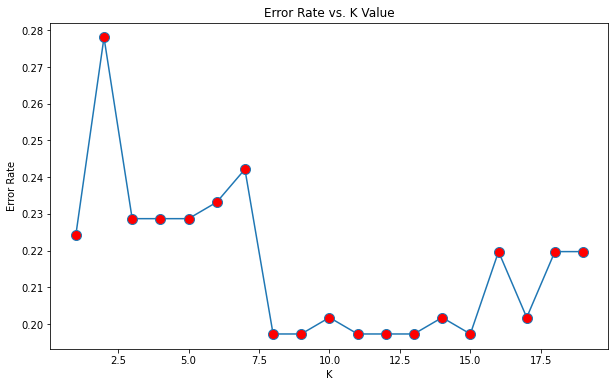

In [20]:
#plot for error rate to the K value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
#appling knn at the neighbor count = 4 and includes:precision, recall, f1-score, and support
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy : %.3f' % (accuracy_score(y_test, y_pred)*100) +'%')
print(classification_report(y_test, y_pred))

Accuracy : 77.130%
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       136
           1       0.78      0.57      0.66        87

    accuracy                           0.77       223
   macro avg       0.77      0.74      0.74       223
weighted avg       0.77      0.77      0.76       223



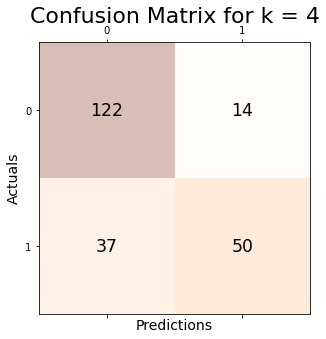

In [22]:
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix for k = 4', fontsize=22)
plt.show()

In [23]:
#appling knn at the neighbor count = 15 and includes:precision, recall, f1-score, and support
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy : %.3f' % (accuracy_score(y_test, y_pred)*100) +'%')
print(classification_report(y_test, y_pred))

Accuracy : 80.269%
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       136
           1       1.00      0.49      0.66        87

    accuracy                           0.80       223
   macro avg       0.88      0.75      0.76       223
weighted avg       0.85      0.80      0.78       223



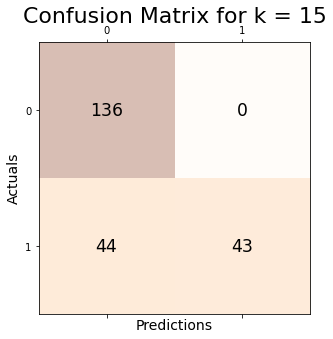

In [24]:
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix for k = 15', fontsize=22)
plt.show()

In [25]:
#appling knn at the neighbor count = 2 and includes:precision, recall, f1-score, and support
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy : %.3f' % (accuracy_score(y_test, y_pred)*100) +'%')
print(classification_report(y_test, y_pred))

Accuracy : 72.197%
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       136
           1       0.74      0.45      0.56        87

    accuracy                           0.72       223
   macro avg       0.73      0.67      0.68       223
weighted avg       0.72      0.72      0.70       223



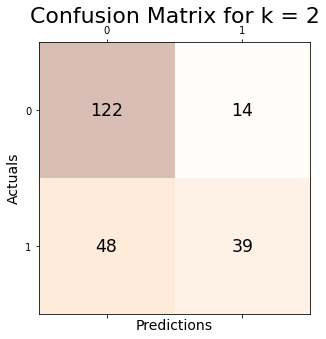

In [26]:
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix for k = 2', fontsize=22)
plt.show()

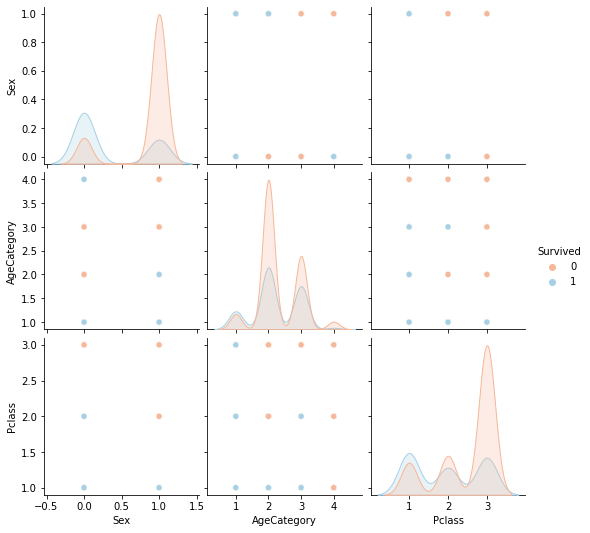

In [27]:
cols = ['Sex', 'AgeCategory', 'Pclass', 'Survived']
sns.pairplot(data = df[cols], hue = 'Survived', palette = 'RdBu')

##KNN REPORT

1.Team Contribution:
Subhash, Varun Adit, and Supreetha communicated and contributed equally throughout the project.
Varun Adit gone through the preprocessing and cleansing of data and the techniques of visualization of data. He also contributed for better understanding of dataset.
Subhash was responsible for exploring python functions and pandas’ libraries. He put forth her knowledge with us which helped us complete the python part of this assignment.
Supreetha has gone through site browsing which helped in completing the project and helped in accuracy and Report making.

2.  Explaining the Nearest Neighbors method:
The k-nearest neighbors (KNN) algorithm is a data categorization technique for calculating the likelihood that a data point will join one group, or another based on the group to which the data points closest to it belong. A supervised machine learning approach known as the k-nearest neighbor algorithm is used to resolve classification and regression issues. But classification issues are where it's most frequently applied.
K-nearest neighbors’ categorization is straightforward to comprehend and use. When the data points are well-defined or non-linear, it works well.
To decide the class of an unobserved observation, KNN essentially uses a voting method. This indicates that the class that receives the most votes will be the class for the relevant data point.
If K is equal to 1, we will only consider a data point's closest neighbor when determining its class. The ten closest neighbors will be used if K is equal to ten, and so on.
The Euclidean distance, Manhattan distance, hamming distance, and Minkowski distance are the four methods for calculating the distance between a data point and its closest neighbor. The Euclidean distance is the distance function or metric that is most frequently applied among the three.
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy : %.3f' % (accuracy_score(y_test, y_pred)*100) +'%')
print(classification_report(y_test, y_pred))

3. Explain what your criteria was for selecting the three attributes
I have selected the 3 attributes Pclass, Sex, Age because:

1.	Pclass
 
sns.barplot(x='Pclass', y='Survived', data=train_df)
Here, it is evident that Pclass affects a person's likelihood of survival, especially if that individual is in class 1.

2.	Age and Sex:

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

 
It is clear that males, and to a lesser extent women, have a higher chance of surviving when they are between the ages of 18 and 30. Between the ages of 14 and 40, women have a greater probability of surviving.

Between the ages of 5 and 18, men have an extremely low chance of surviving, while women do not. Furthermore, newborns have a slightly greater chance of surviving than adults.

I'll develop age groups later because it seems that there are some ages that have higher survival rates and because I want every feature to be generally on the same scale.

What other 3 attribute can you choose?
 I would have selected the 3 attributes Pclass, Sex, Embarked because:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None )
FacetGrid.add_legend()
 
Depending on the gender, embarked seems to be connected with survival.
Women who are on ports Q and S are more likely to survive. If they are at port C, the opposite is true. If men are on port C, their chances of survival are good; nevertheless, if they are on port Q or S, their chances are poor.







4. Visualizations of the classifier in a 2D projection, and write your observations.
 
 
Here, it is evident that Pclass affects a person's likelihood of survival, especially if that individual is in class 1. It is clear that males, and to a lesser extent women, have a higher chance of surviving when they are between the ages of 18 and 30. Between the ages of 14 and 40, women have a greater probability of surviving. Between the ages of 5 and 18, men have an extremely low chance of surviving, while women do not. Furthermore, newborns have a slightly greater chance of surviving than adults. I’ll develop age groups later because it seems that there are some ages that have higher survival rates and because I want every feature to be generally on the same scale.




5.  Interpret and compare the results explain in detail
Here we can see that as the k value increases the error rate has decreased. The error rate was high when k value is in between 1 and 2. The error rate line is stable from 2 to 12.5 and the Accuracy is max at K= 15, 17,19. 
Accuracy at K= 4 : 80.269
Accuracy at K= 15 : 81.166
Accuracy at K= 2 : 80.269
For all the values of K we are getting the accuracy more than 80 percent and for the k values at 15, 17, 19 getting the highest accuracy of 81.166


References:
https://learn.g2.com/k-nearest-neighbor
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
https://github.com/ElsitaK/Titanic_kNN
https://thedatamonk.com/kaggle-titanic-solution/
https://www.kaggle.com/competitions/titanic-dataset/data?select=titanic_train.csv
